# Simple Linear Regression

## Load libraries

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## ignore warnings
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

from sklearn.model_selection import train_test_split

## I. Question

Did the advertisements help increase sales? 

## II. Data Collection

In [8]:
data = pd.read_csv("Data/advertisingBudget_and_Sales.csv")
data.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
data = data[['TV Ad Budget ($)', 'Sales ($)']]
data.rename(columns={'TV Ad Budget ($)' : 'TV_Ad_Budget', 'Sales ($)' : 'Sales'}, inplace=True)
data.columns    ## columns of data

Index(['TV_Ad_Budget', 'Sales'], dtype='object')

In [12]:
## shape of data
data.shape

(200, 2)

In [14]:
## Get a quick description of the data (total number of rows, each attribute’s type, and number of non-null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV_Ad_Budget  200 non-null    float64
 1   Sales         200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [16]:
## Basics statistics: summarize dataset with descriptives statistics
data.describe()

,TV_Ad_Budget,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


The first line, count displays the number of observations. For example for TV_Ad_Budget feature, there are 200 samples, the minimum is 0.700000 and, the maximum is 296.400000. The mean is 147.042500 and the standard deviation is 85.854236. 25% of observations fall under 74.375000, 50% of observations fall under 149.750000 and 75% of observations fall under 218.825000

## III. Data Cleaning


Missing values of each column:
TV_Ad_Budget    0
Sales           0
dtype: int64

Percentage of Missing Data:
TV_Ad_Budget    0.0
Sales           0.0
dtype: float64


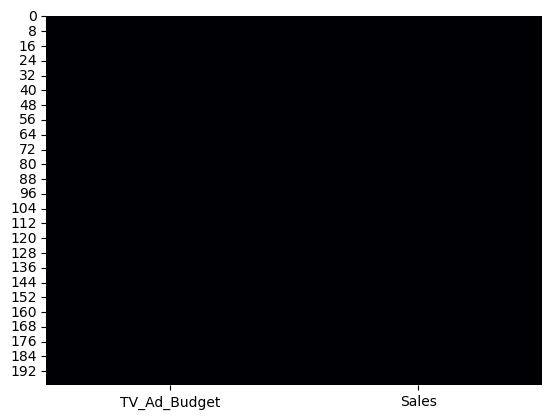

In [19]:
## Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values of each column:")
print(missing_values)

sns.heatmap(data.isnull(),cmap = 'magma', cbar = False)


missing_percentage = (missing_values / len(data)) * 100
print("\nPercentage of Missing Data:",)
print(missing_percentage)

In [21]:
## Duplicated Values are there?
duplicate = data.duplicated().sum()
print(duplicate)

0


## IV. Exploration Data Analysis (EDA) & Data Visualization

### Outliers detection

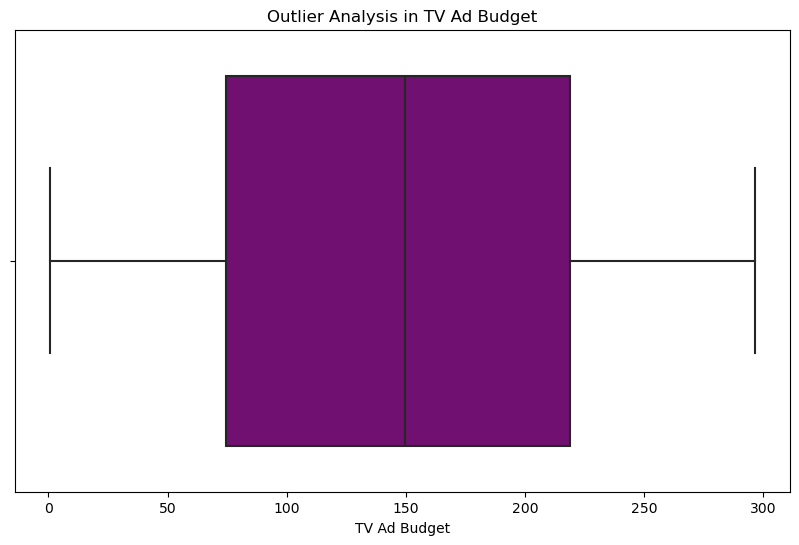

In [25]:
## Boxplot => TV_Ad_Budget attribute
plt.figure(figsize = (10,6))
sns.boxplot(x=data['TV_Ad_Budget'], color = 'purple')
plt.title('Outlier Analysis in TV Ad Budget')
plt.xlabel('TV Ad Budget')
plt.show()

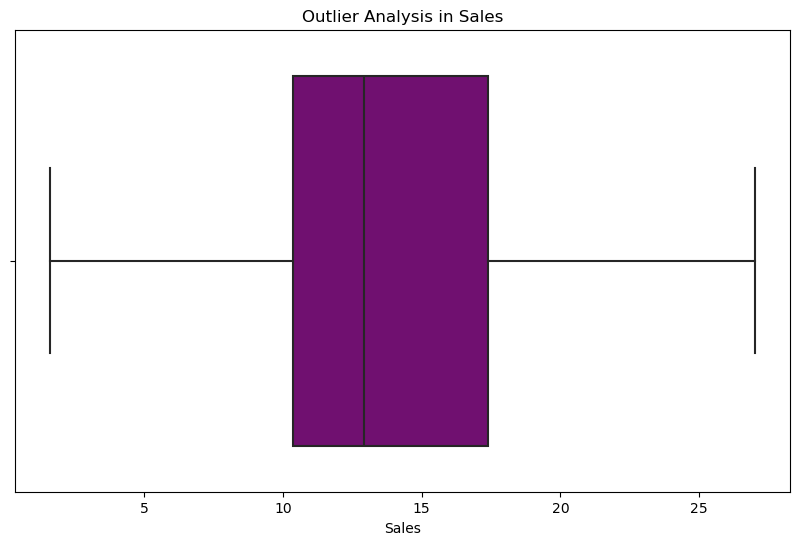

In [27]:
## Boxplot => Sales attribute
plt.figure(figsize = (10,6))
sns.boxplot(x=data['Sales'], color = 'purple')
plt.title('Outlier Analysis in Sales')
plt.xlabel('Sales')
plt.show()

No outliers detected

### Correlation Analysis

              TV_Ad_Budget     Sales
TV_Ad_Budget      1.000000  0.782224
Sales             0.782224  1.000000


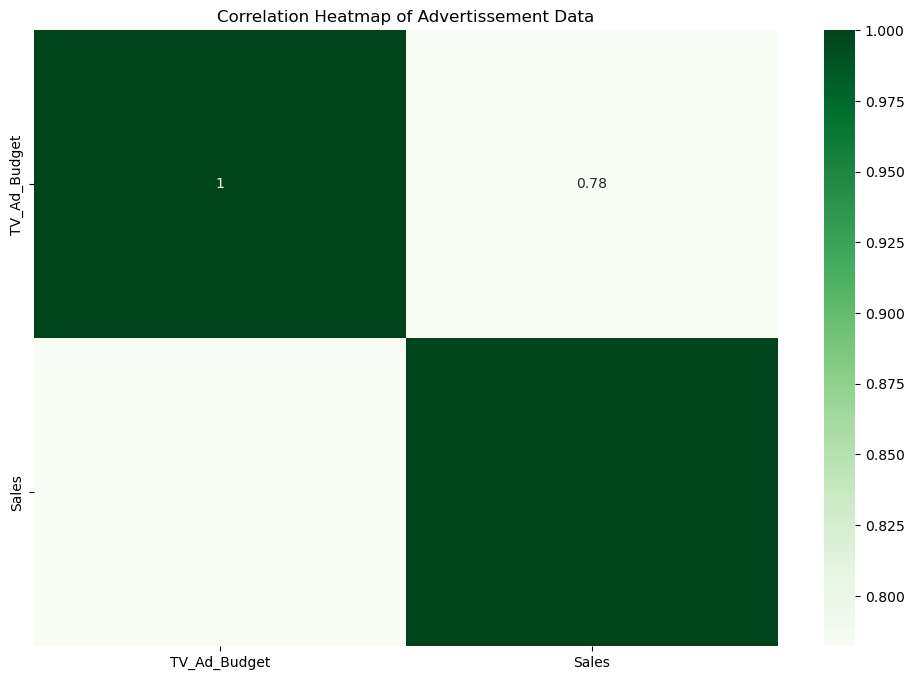

In [34]:
## Correlation Analysis - heatmap
print(data.corr())

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="Greens")
plt.title('Correlation Heatmap of Advertissement Data')
plt.show()

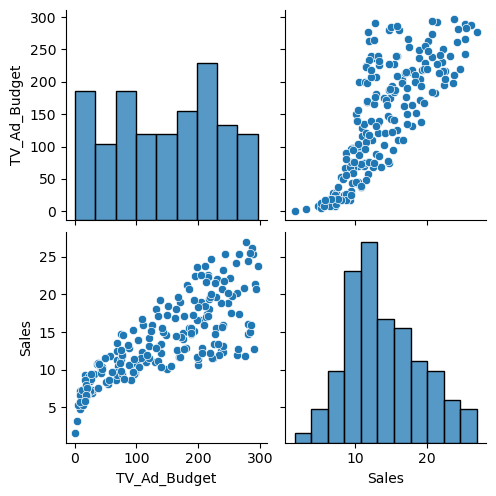

In [233]:
sns.pairplot(data)
plt.show()

## V. Model

### Machine Learning model

In [41]:
## Data preparation: define X (features or independent variables) and y(target or dependent variable)
features = ['TV_Ad_Budget']
target = ['Sales']

X = data[features]
y = data[target]

In [43]:
print(X.head())
print(y.head())

   TV_Ad_Budget
0         230.1
1          44.5
2          17.2
3         151.5
4         180.8
   Sales
0   22.1
1   10.4
2    9.3
3   18.5
4   12.9


In [45]:
## Splitting Data into training set and test set
## test_size specifies the proportion of data to be included in test set
## random_state ensures reproducibility of split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [47]:
print("\nTraining data shape: ",X_train.shape)
print("\nTest data shape: ",X_test.shape)


Training data shape:  (160, 1)

Test data shape:  (40, 1)


In [49]:
## check the size of training set and test set
print(f'Training set size : {X_train.shape[0]} samples')
print(f'Test set size : {X_test.shape[0]} samples')

Training set size : 160 samples
Test set size : 40 samples


### Linear Regression Model with Statsmodels.api library

In [52]:
## Training
## Adding a constant to the predictors because statsmodels'OLS doesn't include it by default
X_trainConst = sm.add_constant(X_train)
X_trainConst.head()

,const,TV_Ad_Budget
79,1.0,116.0
197,1.0,177.0
38,1.0,43.1
24,1.0,62.3
122,1.0,224.0


In [54]:
## Fit the OLS model
modelFitted = sm.OLS(y_train, X_trainConst).fit()

## Summary of model
print(modelFitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     228.5
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.68e-32
Time:                        11:55:16   Log-Likelihood:                -415.93
No. Observations:                 160   AIC:                             835.9
Df Residuals:                     158   BIC:                             842.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.1196      0.530     13.446   

### Checking linear regression assumptions

#### Assumption 1 : Linearity
The relationship between the dependent variable (sales) and the independent variable (TV_Ad_Budget) must be linear.

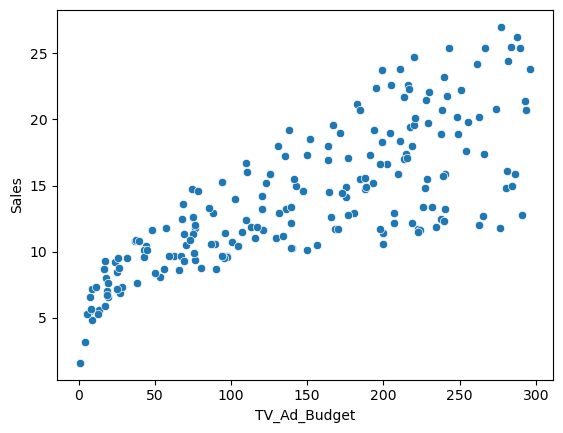

In [185]:
sns.scatterplot(data,x="TV_Ad_Budget", y ="Sales")
plt.show()

Visually, the relationship is linear: the more the advertising budget increases, the more sales increase.

#### Assumption 2 : Nullity of the expected value of the errors
The mean of the residuals (prediction error) must be zero.

In [191]:
residuals_mean = np.mean(modelFitted.resid)
print(f'The mean of the residuals is : {residuals_mean}')

The mean of the residuals is : 9.781064846947628e-15


#### Assumption 3: Absence of autocorrelation
The residuals are not correlated with each other.
The Durbin-Watson test is used to check for the presence of positive or negative autocorrelation of the residuals in a regression model:

Durbin-Watson (DW) statistic:
    * If DW is close to 2, it suggests no autocorrelation.
    * If DW is significantly less than 2, it suggests positive autocorrelation (residuals are positively correlated).
    * If DW is significantly greater than 2, it suggests negative autocorrelation (residuals are negatively correlated).

In [195]:
dw_stat = durbin_watson(modelFitted.resid)

# Print the Durbin-Watson statistic
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 2.0947477233886724


DW is close to 2 so there is no autocorrelation.

#### Assumption 4: Homoscedasticity
The variance of the residuals is constant.
To validate this hypothesis, we can:
Perform a graphical analysis: between the values ​​predicted by the model and the residuals
Perform the White test or the Breush-Pagan test

In [199]:
homoscedasticite_data = {'Predicted' : modelFitted.predict(X_trainConst), 'Residuals': modelFitted.resid}
homoscedasticite_data = pd.DataFrame(homoscedasticite_data)
homoscedasticite_data.head()

,Predicted,Residuals
79,12.517088,-1.517088
197,15.355401,-2.555401
38,9.125070,0.974930
24,10.018441,-0.318441
122,17.542299,-5.942299


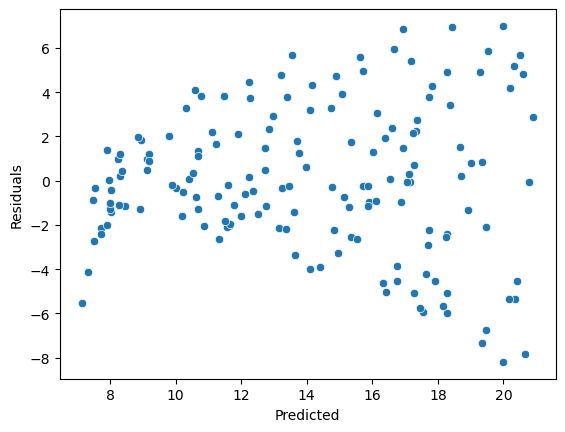

In [201]:
sns.scatterplot(homoscedasticite_data,x="Predicted", y ="Residuals")
plt.show()

The graph has no particular shape or trend so we can confirm that there is homoscedasticity.

In [140]:
## Breusch-Pagan test
lm_stat, lm_p_value, f_stat, f_p_value = het_breuschpagan(modelFitted.resid, X_trainConst)

# Print results
print(f"Statistic du test LM: {lm_stat}")
print(f"P-value du test LM: {lm_p_value}")
print(f"Statistic du test F: {f_stat}")
print(f"P-value du test F: {f_p_value}")

Statistic du test LM: 39.76975658597894
P-value du test LM: 2.857355602213697e-10
Statistic du test F: 52.263235623224936
P-value du test F: 1.9586591390808337e-11


#### Assumption 5 : Normality of residuals
The residuals follow a normal distribution.

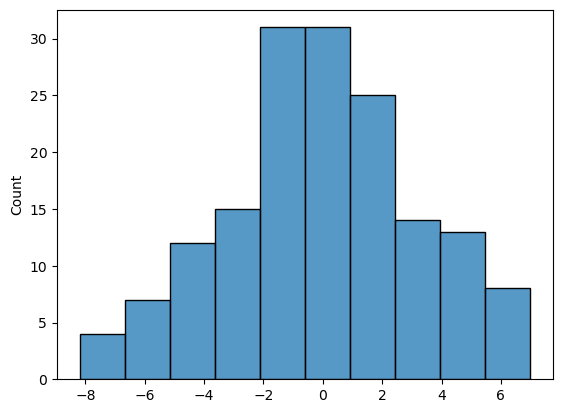

In [207]:
sns.histplot(modelFitted.resid)
plt.show()

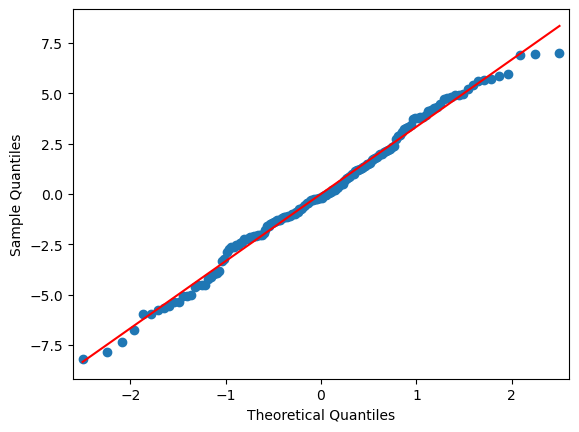

In [209]:
sm.qqplot(modelFitted.resid, line='r')
plt.show()

In [214]:
stat, p_value = stats.shapiro(modelFitted.resid)

# Print the test statistic and p-value
print(f"Shapiro-Wilk test statistic: {stat}")
print(f"P-value: {p_value}")

Shapiro-Wilk test statistic: 0.9898115992546082
P-value: 0.3039476275444031


pvalue > 5% so the residuals follow a normal distribution.

The 5 hypotheses are validated and we can therefore interpret the model obtained: the estimators are reliable, are BLUE. The model is reliable and statistically robust.

### Interpreting Results

Intercept (const:  7.1196): sales increase by 7.1196 when independent variables (TV advertisements) is null.


####  Coefficients of the independent variabl 
For one unit increase in TV Ad Budget, sales increase by0.0465s, Thevariable TV Ad Budget coefficient hase p-values ​​equal to 0.000, which indicates thatit is  statistically significant.4 R-squared:0.591 
==>589% of sales variability is explained byTV Ad Budget.
Prob (F-statistic): 1.68e-32 is < 5% so the model obtained is statistically significant

)

## VI. Model evaluation

In [223]:
rmse = np.sqrt(np.mean(modelFitted.resid**2))
print(f"Root Mean Square Error is: {rmse}")

Root Mean Square Error is: 3.2563170255657345


## VII. Predictions

In [170]:
X_testConst = sm.add_constant(X_test)
X_testConst.head()

,const,TV_Ad_Budget
95,1.0,163.3
15,1.0,195.4
30,1.0,292.9
158,1.0,11.7
128,1.0,220.3


In [225]:
predictedResults = modelFitted.predict(X_testConst)
predictedResults.head()

95     14.717944
15     16.211548
30     20.748197
158     7.664036
128    17.370139
dtype: float64

Answer: the advertisement help increase sales. 59% of variability of sales is explained by TV_Ad_Budget.